# Getting started with DataJoint

Congratulations! If you are reading this, you have successfully connected to the first DataJoint tutorial notebook: `01-DataJoint Basics`. This tutorial will walk you through the major concepts and steps to use DataJoint. 

## Essential concepts and setup


Both interactive and local environments come with the latest DataJoint Python package pre-installed, along with many other popular [Python](https://www.python.org/) packages for scientific computations such as [NumPy](http://www.numpy.org/), [SciPy](https://www.scipy.org/), and [Matplotlib](https://matplotlib.org/). Like any other package, to start using [DataJoint](https://datajoint.com/docs/), you must first import the package  `datajoint`. The convention is to alias the package to `dj`.

*NOTE: Run code cells by clicking on the left-top corner bottom of the cell or using Ctrl+Enter shortcut.*

In [1]:
import datajoint as dj

### Data pipelines


##### Concept


A data pipeline is a collection of processes and steps for organizing the data, computations, and workflows. Data pipelines jointly perform complex data acquisition sequences, processing, and analysis with integrated storage at each step. These steps may be thought of as nodes in a graph. 

In other words, a data pipeline can be seen as a network where each node or entity set represents a **table**. The information involved in a research project or a whole research lab can be organized and stored in these entity sets or tables. Examples of these tables are: "Subject", "Session", "Implantation", "Experimenter", "Equipment", but also "OptoWaveform", "OptoStimParams", or "Neuronal spikes".  

The data pipeline is formed by making these tables interdependent (as the nodes are connected in a network). A **dependency** is a situation where a step of the data pipeline is dependent on a result from a sequentially previous step before it can complete its execution. A dependency graph forms an entire cohesive data pipeline. 

A [DataJoint pipeline](https://datajoint.com/docs/core/datajoint-python/0.14/concepts/terminology/) contains database table definitions, dependencies, and associated computations, together with the transformations underlying a DataJoint workflow. 

This is an example of a DataJoint pipeline from [Optogenetics Element](https://datajoint.com/docs/elements/element-optogenetics/0.1/):

![pipeline](https://raw.githubusercontent.com/datajoint/element-optogenetics/main/images/pipeline.svg)

A **well-designed data pipeline**: 
- 1. Collects, organizes and stores **every relevant piece of information during the scientific research**
- 2. Integrates, processes and connects these pieces of information through **several steps**
- 3. Analyses and transforms the input data into **valuable insights for the research**, bringing together logical clarity to the experiments


##### Practical example

The practical example that is used during these tutorials will be to design and compute a data pipeline for a scientific project of two experiments on rodents: 
- Single-electrode recording
- Calcium imaging recording

Here is a brief description:

> * Your lab houses many mice, and each mouse is identified by a unique ID. You also want to keep track of other information about each mouse such as their date of birth, and gender.
> * As a hard-working neuroscientist, you perform experiments every day, sometimes working with more than one mouse in a day. However, on any given day, a mouse undergoes at most one recording session.
> * For each experimental session, you want to record what mouse you worked with and when you performed the experiment. You also want to keep track of other helpful information such as the experimental setup you worked on.  

> * In a session of electrophysiology:
>> * You record electrical activity from a single neuron. You use recording equipment that produces separate data files for each neuron you recorded.
>> * Neuron's activities are recorded as raw traces. Neuron's spikes needs to be detected for further analysis to be performed.
> * In a session of calcium imaging:
>> * You scan a brain region containing a number of neurons. You use recording equipment that produces separate data files for each scan you performed.
>> * You need to segment the frames and get the regions of interest (ROIs), and save a mask for each ROI
>> * In addition, you need to extract the trace from each segmented ROI

The design of a data pipeline starts by identifying the **entities** or **tables** in your research project. Common entities include experimental subjects (e.g. mouse), recording sessions, and two-photon scans.

Let's revisit the project description, this time paying special attention to **what** (e.g. nouns or entities) about your experiment. Here some particular entities are highlighted.

> * Your lab houses many **mice**, and each mouse is identified by a unique ID. You also want to keep track of other information about each mouse such as their date of birth, and gender.
> * As a hard-working neuroscientist, you perform experiments every day, sometimes working with more than one mouse in a day. However, on any given day, a mouse undergoes at most one recording session.
> * For each **experimental session**, you want to record what mouse you worked with and when you performed the experiment. You also want to keep track of other helpful information such as the experimental setup you worked on.  

> * In a session of electrophysiology:
>> * You record electrical activity from a **single neuron**. You use recording equipment that produces separate data files for each neuron you recorded.
>> * Neuron's activities are recorded as raw traces. **Neuron's spikes** needs to be detected for further analysis to be performed.
> * In a session of calcium imaging:
>> * You **scan** a brain region containing a number of neurons. You use recording equipment that produces separate data files for each scan you performed.
>> * You need to segment the frames and get the **regions of interest (ROIs)**, and save a mask for each ROI
>> * In addition, you need to extract the **trace** from each segmented ROI

Just by going though the description, we can start to identify **entities** that need to be stored and represented in our data pipeline:

>* Mouse
>* Experimental session

For Ephys:

>* Neuron
>* Spikes

For Calcium Imaging:

>* Scan
>* Regions of interest (ROI)
>* Trace

In the next section you will learn to design the tables and manipulate the data for `Mouse` and `Experimental sessions`. The rest of the pipeline (`Ephys` and `Calcium Imaging` will be addressed in the subsequent tutorials.

### Schemas, tables and basic relational operators

##### Concepts

In a data pipeline, we represent these **entities** as **tables**. Different *kinds* of entities become distinct tables, and each row of the table is a single example (instance) of the entity's category. 

For example, if we have a `Mouse` table, then each row in the mouse table represents a single mouse. 

It is important to think what information will **uniquely identify** each entry. 

In this case, the information that uniquely identifies the `Mouse` table is their **mouse IDs** - a unique ID number assigned to each animal in the lab. This attribute is named the **primary key** of the table.

| Mouse_ID (*Primary key attribute*)|
|:--------: |                         
| 11234     |
| 11432     |

After some thought, we might conclude that each mouse can be uniquely identified by knowing its **mouse ID** - a unique ID number assigned to each mouse in the lab. 

The mouse ID is then a column in the table or an **attribute** that can be used to **uniquely identify** each mouse. 

Such attribute is called the **primary key** of the table: the subset of table attributes that uniquely identify each entity in the table. The **secondary attribute** refers to any field in a table not in the primary key.

| Mouse_ID (*Primary key attribute*) 
|:--------:|  
| 11234      (*Secondary attribute*)
| 11432      (*Secondary attribute*)

Once we have successfully identified the primary key of the table, we can now think about what other columns, or **non-primary key attributes** - additional information **about each entry in the table that need to be stored as well**.

For the case of `Mouse`, what other information about the mouse you might want to store? 

Based on the project description, we would probably want to store information such as the mouse's **date of birth** (DOB) and **sex**.

| Mouse_ID | DOB        | sex |
|:--------:|------------|--------|
| 11234    | 2017-11-17 | M      |
| 11432    | 2018-03-04 | F      |

Now we have an idea on how to represent information about mouse, let's create the table using **DataJoint**!

##### Practical example

##### Schema

Every table lives inside a schema - a logical collection of one or more tables in your pipeline. Your final pipeline may consists of many tables spread across one or more schemas. Let's go ahead and create the first schema to house our `Mouse` table using DataJoint.

We create the schema using `dj.schema()` function, passing in the name of the schema. For this tutorial, we create a schema called `tutorial`.

In [2]:
schema = dj.schema('tutorial')

[2023-07-24 22:36:18,016][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-07-24 22:36:18,073][INFO]: Connected root@fakeservices.datajoint.io:3306


Now that we have a schema to place our table into, let's go ahead and define our first table. 

##### Table

In DataJoint, you define each table as a `class`, and provide the table definition (e.g. attribute definitions) as the `definition` static string property. The class will inherit from the `dj.Manual` class provided by DataJoint (more on this later).

In [3]:
@schema
class Mouse(dj.Manual):
    definition = """
    # Experimental animals
    mouse_id             : int                          # Unique animal ID
    ---
    dob=null             : date                         # date of birth
    sex="unknown"        : enum('M','F','unknown')      # sex
    """

Let's take a look at our brand new table

In [4]:
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex


##### Insert operators

The table was successfully defined, but without any content, the table is not too interesting. Let's go ahead and **insert some mouse information** into the table, one at a time using the `insert1` method.

Let's `insert1` a mouse with the following information:
* mouse_id: 0
* date of birth: 2017-03-01
* sex: male

In [5]:
Mouse.insert1((0, '2017-03-01', 'M'))

In [6]:
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M


You can also `insert1` as a dictionary

In [7]:
data = {
    'mouse_id': 100,
    'dob': '2017-05-12',
    'sex': 'F'
}

In [8]:
Mouse.insert1(data)

In [9]:
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
100,2017-05-12,F


We can also insert multiple **mice** together using the `insert` method, passing in a list of data.

In [10]:
data = [
  (1, '2016-11-19', 'M'),
  (2, '2016-11-20', 'unknown'),
  (5, '2016-12-25', 'F')
]

In [11]:
Mouse.insert(data)

Of course, you can `insert` a list of dictionaries

In [12]:
data = [
    {'mouse_id': 10, 'dob': '2017-01-01', 'sex': 'F'},
    {'mouse_id': 11, 'dob': '2017-01-03', 'sex': 'F'},
]

# insert them all
Mouse.insert(data)

In [13]:
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
1,2016-11-19,M
2,2016-11-20,unknown
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
100,2017-05-12,F


##### Data integrity

DataJoint checks for data integrity, and ensures that you don't insert a duplicate by mistake. Let's try inserting another mouse with `mouse_id: 0` and see what happens!

In [14]:
Mouse.insert1(
{'mouse_id': 0,
 'dob': '2018-01-01',
 'sex': 'M',
})

DuplicateError: ("Duplicate entry '0' for key 'mouse.PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

Go ahead and insert a few more mice into your table before moving on.

In [15]:
data = [
    {'mouse_id': 12, 'dob': '2017-03-21', 'sex': 'F'},
    {'mouse_id': 18, 'dob': '2017-05-01', 'sex': 'F'},
    {'mouse_id': 19, 'dob': '2018-07-21', 'sex': 'M'},
    {'mouse_id': 22, 'dob': '2019-12-15', 'sex': 'F'},
    {'mouse_id': 34, 'dob': '2018-09-22', 'sex': 'M'}
]

# insert them all
Mouse.insert(data)

In [16]:
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
1,2016-11-19,M
2,2016-11-20,unknown
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
19,2018-07-21,M
22,2019-12-15,F


In [17]:
# ENTER YOUR CODE - Insert more mice


### Create tables with dependencies

Congratulations! We have successfully created your first table! We are now ready to tackle and include other **entities** in the project into our data pipeline. 

Let's now have a look at representing an `experimental session`.

As with `mouse`, we should think about **what information (i.e. attributes) is needed to uniquely identify an `experimental session`**. Here is the relevant section of the project description:

> * As a hard-working neuroscientist, you perform experiments every day, sometimes working with **more than one mouse in a day**. However, on any given day, **a mouse undergoes at most one recording session**.
> * For each **experimental session**, you want to record **what mouse you worked with** and **when you performed the experiment**. You also want to keep track of other helpful information such as the **experimental setup** you worked on.  

Based on the above, it seems that you need to know:

* the date of the session
* the mouse you recorded from in that session

to uniquely identify a single experimental session.

Note that, to uniquely identify an experimental session (or simply a **session**), we need to know the mouse that the session was about. In other words, a session cannot existing without a corresponding mouse! 

With **mouse** already represented as a table in our pipeline, we say that the session **depends on** the mouse! We could graphically represent this in an **entity relationship diagram (ERD)** by drawing the line between two tables, with the one below (**session**) depending on the one above (**mouse**).

Thus, we will need both **mouse** and a new attribute **session_date** to uniquely identify a single `session`. 

Remember that a **mouse** is already uniquely identified by its primary key - **mouse_id**. In DataJoint, you can declare that **session** depends on the mouse, and DataJoint will automatically include the mouse's primary key (`mouse_id`) as part of the session's primary key, along side any additional attribute(s) you specificy.

In [18]:
@schema
class Session(dj.Manual):
    definition = """
    # Experiment session
    -> Mouse
    session_date               : date                         # date
    ---
    experiment_setup           : int                          # experiment setup ID
    experimenter               : varchar(100)                 # experimenter name
    data_path=''               : varchar(255)                 #
    """

You can actually generate something similar to an entity relationship diagram (ERD) on the fly by calling `dj.Diagram` with the schema object. Many of the symbols and features are the same as the ERD standard.

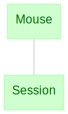

In [19]:
dj.Diagram(schema)

Let's try inserting a few sessions manually.

In [20]:
data = {
  'mouse_id': 0,
  'session_date': '2017-05-15',
  'experiment_setup': 0,
  'experimenter': 'Edgar Y. Walker'
}

Session.insert1(data)

In [21]:
Session()

mouse_id Unique animal ID,session_date date,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2017-05-15,0,Edgar Y. Walker,


Let's insert another session for `mouse_id = 0` but on a different date.

In [22]:
data = {
  'mouse_id': 0,
  'session_date': '2018-01-15',
  'experiment_setup': 100,
  'experimenter': 'Jacob Reimer'
}

Session.insert1(data)

Session()

mouse_id Unique animal ID,session_date date,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2017-05-15,0,Edgar Y. Walker,
0,2018-01-15,100,Jacob Reimer,


And another session done on the same date but on a different mouse

In [23]:
data = {
  'mouse_id': 18,
  'session_date': '2018-01-15',
  'experiment_setup': 101,
  'experimenter': 'Jacob Reimer'
}

# insert them all
Session.insert1(data)

In [24]:
Session()

mouse_id Unique animal ID,session_date date,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2017-05-15,0,Edgar Y. Walker,
0,2018-01-15,100,Jacob Reimer,
18,2018-01-15,101,Jacob Reimer,


What happens if we try to insert a session for a mouse that doesn't exist?

In [25]:
bad_data = {
    'mouse_id': 9999,  # this mouse doesn't exist!
    'session_date': '2017-05-15',
    'experiment_setup': 0,
    'experimenter': 'Edgar Y. Walker'
}

In [26]:
Session.insert1(bad_data)

IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`tutorial`.`session`, CONSTRAINT `session_ibfk_1` FOREIGN KEY (`mouse_id`) REFERENCES `mouse` (`mouse_id`) ON DELETE RESTRICT ON UPDATE CASCADE)

### Querying data

Often times, you don't want all the data but rather work with **a subset of entities** matching specific criteria. Rather than fetching the whole data and writing your own parser, it is far more efficient to narrow your data to the subset before fetching.

For this, DataJoint offers a very powerful yet intuitive **querying syntax** that will let you select exactly the data you want before you fetch it.

It is also critical to note that the result of any DataJoint query represents a valid entity.

We will introduce four major types of queries used in DataJoint:
* 1. Restriction (`&`) and negative restriction (`-`): filter data
* 2. Join (`*`): bring fields from different tables together
* 3. Projection (`.proj()`): focus on a subset of attributes
* 4. Aggregation (`.aggr()`): simple computation of one table against another table

### Restrictions (`&`) - filter data with certain conditions

The **restriction** operation, `&`, allows you to specify the criteria to narrow down the table on the left.

##### Exact match

Mouse with id 0

In [27]:
Mouse & 'mouse_id = 0'

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M


All male mice (`'sex = "M"'`)

In [28]:
Mouse & 'sex = "M"'

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
1,2016-11-19,M
19,2018-07-21,M
34,2018-09-22,M


All female mice (`'sex="F"'`)

In [29]:
Mouse & 'sex = "F"'

mouse_id Unique animal ID,dob date of birth,sex sex
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
22,2019-12-15,F
100,2017-05-12,F


We can also use as a dictionary as a restrictor, with one field or multiple fields

In [30]:
Mouse & dict(mouse_id=5)

mouse_id Unique animal ID,dob date of birth,sex sex
5,2016-12-25,F


### Inequality

You can also use inequality in your query to match based on numerical values.

Mouse that is born **after 2017-01-01**

In [31]:
Mouse & 'dob > "2017-01-01"'

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
19,2018-07-21,M
22,2019-12-15,F
34,2018-09-22,M
100,2017-05-12,F


Mouse that is born within a range of dates

In [32]:
Mouse & 'dob between "2017-03-01" and "2017-08-23"'

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
12,2017-03-21,F
18,2017-05-01,F
100,2017-05-12,F


Mouse that is **not** male

In [33]:
Mouse & 'sex != "M"'

mouse_id Unique animal ID,dob date of birth,sex sex
2,2016-11-20,unknown
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
22,2019-12-15,F
100,2017-05-12,F


You can easily combine multiple restrictions to narrow down the entities based on multiple attributes.

Let's find all mice that **are not male** AND **born after 2017-01-01**.

In [34]:
Mouse & 'sex != "M"' & 'dob > "2017-01-01"'

mouse_id Unique animal ID,dob date of birth,sex sex
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
22,2019-12-15,F
100,2017-05-12,F


In [35]:
Mouse & 'sex != "M" and dob > "2017-01-01"'

mouse_id Unique animal ID,dob date of birth,sex sex
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
22,2019-12-15,F
100,2017-05-12,F


The result of one query can be used in another query! Let's first find **all the female mice** and store the result.

In [36]:
female_mice = Mouse & 'sex = "F"'
female_mice

mouse_id Unique animal ID,dob date of birth,sex sex
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
12,2017-03-21,F
18,2017-05-01,F
22,2019-12-15,F
100,2017-05-12,F


and among these mice, find the ones with **mouse_id > 10**

In [37]:
# ENTER YOUR CODE


In Computer Science and Math lingo, DataJoint operations are said to **satisfy closure property**. Practically speaking, this means that the result of a query can immediately be used in another query, allowing you to build more complex queries from simpler ones. 

### Restriction of one table with another

All the mice that have a session:

In [38]:
Mouse & Session 

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
18,2017-05-01,F


### Combining restrictions

All the above queries could be combined:

Male mice that had a session

In [39]:
Mouse & Session & 'sex = "M"'

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M


Selec the mice that participated in an experimental session done on or before 2017-05-19

In [40]:
Mouse & (Session & 'session_date <= "2017-05-19"')

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M


### Negative restriction - with the `-` operator

All mice that do not have any session

In [41]:
Mouse - Session

mouse_id Unique animal ID,dob date of birth,sex sex
1,2016-11-19,M
2,2016-11-20,unknown
5,2016-12-25,F
10,2017-01-01,F
11,2017-01-03,F
12,2017-03-21,F
19,2018-07-21,M
22,2019-12-15,F
34,2018-09-22,M
100,2017-05-12,F


Male mice that do not have any session

In [42]:
# ENTER YOUR CODE


### Joining (*)  - bring fields from different tables together

Sometimes you want to see information from multiple tables combined together to be viewed (and queried!) simultaneously. You can do this using the join `*` operator.

This is how the Join operator works:

1. Match the common field(s) of the primary keys in the two tables
2. Do a combination of the non-matched part of the primary key
3. List out the secondary attributes for each combination
4. If two tables have secondary attributes that share a same name, it will throw an error. To join, we need to rename that attribute for at least one of the tables.

In [43]:
# looking at the combination of mouse and session
Mouse * Session

mouse_id Unique animal ID,session_date date,dob date of birth,sex sex,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2017-05-15,2017-03-01,M,0,Edgar Y. Walker,
0,2018-01-15,2017-03-01,M,100,Jacob Reimer,
18,2018-01-15,2017-05-01,F,101,Jacob Reimer,


Here each row represents a unique (and valid!) combination of a mouse and a session.

The combined table can be queried using any of the attributes (columns) present in the joined tables:

In [44]:
# Find 'experimenter = "Jacob Reimer"' and 'sex = "M"'
Mouse * Session & 'experimenter = "Jacob Reimer"' & 'sex = "M"'

mouse_id Unique animal ID,session_date date,dob date of birth,sex sex,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2018-01-15,2017-03-01,M,100,Jacob Reimer,


In [45]:
Mouse * Session & 'session_date > "2017-05-19"'

mouse_id Unique animal ID,session_date date,dob date of birth,sex sex,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2018-01-15,2017-03-01,M,100,Jacob Reimer,
18,2018-01-15,2017-05-01,F,101,Jacob Reimer,


### Projection .proj(): focus on attributes of interest
Beside restriction (`&`) and join (`*`) operations, DataJoint offers another type of operation: projection (`.proj()`). Projection is used to select attributes (columns) from a table, to rename them, or to create new calculated attributes. 

From the ***Mouse*** table, suppose we want to focus only on the `sex` attribute and ignore the others, this can be done as:

In [46]:
Mouse.proj('sex')

mouse_id Unique animal ID,sex sex
0,M
1,M
2,unknown
5,F
10,F
11,F
12,F
18,F
19,M
22,F


Note that `.proj()` will always retain all attributes that are part of the primary key

### Rename attribute with proj()
Say we want to rename the existing attribute `dob` of the `Mouse` table to `date_of_birth`, this can be done using `.proj()`

In [47]:
Mouse.proj(date_of_birth='dob')

mouse_id Unique animal ID,date_of_birth date of birth
0,2017-03-01
1,2016-11-19
2,2016-11-20
5,2016-12-25
10,2017-01-01
11,2017-01-03
12,2017-03-21
18,2017-05-01
19,2018-07-21
22,2019-12-15


### Perform simple computations with proj()
Projection is perhaps most useful to perform simple computations on the attributes, especially on attributes from multiple tables by using in conjunction with the join (`*`) operation

In [48]:
(Mouse * Session).proj(age='datediff(session_date, dob)')

mouse_id Unique animal ID,session_date date,age calculated attribute
0,2017-05-15,75
0,2018-01-15,320
18,2018-01-15,259


Note: as you can see, the projection results keep the primary attributes from the `Mouse * Session` joining operation, while removing all other non-primary attributes. To Keep all other attributes, you can use the `...` syntax

In [49]:
(Mouse * Session).proj(..., age='datediff(session_date, dob)')

mouse_id Unique animal ID,session_date date,dob date of birth,sex sex,experiment_setup experiment setup ID,experimenter experimenter name,data_path,age calculated attribute
0,2017-05-15,2017-03-01,M,0,Edgar Y. Walker,,75
0,2018-01-15,2017-03-01,M,100,Jacob Reimer,,320
18,2018-01-15,2017-05-01,F,101,Jacob Reimer,,259


### Fetch data

Once you have successfully narrowed down to the entities you want, you can fetch the query results just by calling fetch on it!

### Fetch one or multiple entries: `fetch()`

All the male mice:

In [51]:
male_mouse = Mouse & 'sex = "M"'
male_mouse

mouse_id Unique animal ID,dob date of birth,sex sex
0,2017-03-01,M
1,2016-11-19,M
19,2018-07-21,M
34,2018-09-22,M


Fetch it!

In [52]:
male_mouse.fetch()

array([( 0, datetime.date(2017, 3, 1), 'M'),
       ( 1, datetime.date(2016, 11, 19), 'M'),
       (19, datetime.date(2018, 7, 21), 'M'),
       (34, datetime.date(2018, 9, 22), 'M')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

or all in one step

In [53]:
(Mouse & 'sex = "M"').fetch()

array([( 0, datetime.date(2017, 3, 1), 'M'),
       ( 1, datetime.date(2016, 11, 19), 'M'),
       (19, datetime.date(2018, 7, 21), 'M'),
       (34, datetime.date(2018, 9, 22), 'M')],
      dtype=[('mouse_id', '<i8'), ('dob', 'O'), ('sex', 'O')])

Fetch as a list of dictionaries

In [54]:
(Mouse & 'sex = "M"').fetch(as_dict=True)

[{'mouse_id': 0, 'dob': datetime.date(2017, 3, 1), 'sex': 'M'},
 {'mouse_id': 1, 'dob': datetime.date(2016, 11, 19), 'sex': 'M'},
 {'mouse_id': 19, 'dob': datetime.date(2018, 7, 21), 'sex': 'M'},
 {'mouse_id': 34, 'dob': datetime.date(2018, 9, 22), 'sex': 'M'}]

Fetch as a pandas dataframe

In [55]:
(Mouse & 'sex = "M"').fetch(format='frame')

,dob,sex
mouse_id,,
0,2017-03-01,M
1,2016-11-19,M
19,2018-07-21,M
34,2018-09-22,M


### Fetch the primary key

In [56]:
(Mouse & 'sex = "M"').fetch('KEY')

[{'mouse_id': 0}, {'mouse_id': 1}, {'mouse_id': 19}, {'mouse_id': 34}]

### Fetch specific fields

In [57]:
sex, dob = Mouse.fetch('sex', 'dob')

In [58]:
sex

array(['M', 'M', 'unknown', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F'],
      dtype=object)

In [59]:
dob

array([datetime.date(2017, 3, 1), datetime.date(2016, 11, 19),
       datetime.date(2016, 11, 20), datetime.date(2016, 12, 25),
       datetime.date(2017, 1, 1), datetime.date(2017, 1, 3),
       datetime.date(2017, 3, 21), datetime.date(2017, 5, 1),
       datetime.date(2018, 7, 21), datetime.date(2019, 12, 15),
       datetime.date(2018, 9, 22), datetime.date(2017, 5, 12)],
      dtype=object)

Or fetch them together as a list of dictionaries

In [60]:
info = Mouse.fetch('sex', 'dob', as_dict=True)
info

[{'dob': datetime.date(2017, 3, 1), 'sex': 'M'},
 {'dob': datetime.date(2016, 11, 19), 'sex': 'M'},
 {'dob': datetime.date(2016, 11, 20), 'sex': 'unknown'},
 {'dob': datetime.date(2016, 12, 25), 'sex': 'F'},
 {'dob': datetime.date(2017, 1, 1), 'sex': 'F'},
 {'dob': datetime.date(2017, 1, 3), 'sex': 'F'},
 {'dob': datetime.date(2017, 3, 21), 'sex': 'F'},
 {'dob': datetime.date(2017, 5, 1), 'sex': 'F'},
 {'dob': datetime.date(2018, 7, 21), 'sex': 'M'},
 {'dob': datetime.date(2019, 12, 15), 'sex': 'F'},
 {'dob': datetime.date(2018, 9, 22), 'sex': 'M'},
 {'dob': datetime.date(2017, 5, 12), 'sex': 'F'}]

### Fetch data from only one entry: `fetch1()`

When knowing there's only 1 result to be fetched back, we can use `.fetch1()`. `fetch1` will always return the fetched result in a dictionary format

In [61]:
mouse_0 = (Mouse & {'mouse_id': 0}).fetch1()  # "fetch1()" because we know there's only one
mouse_0

{'mouse_id': 0, 'dob': datetime.date(2017, 3, 1), 'sex': 'M'}

`fetch1()` could also fetch the primary key

In [62]:
(Mouse & {'mouse_id': 0}).fetch1('KEY')

{'mouse_id': 0}

or fetch specific fields:

In [63]:
sex, dob = (Mouse & {'mouse_id': 0}).fetch1('sex', 'dob')

In [64]:
sex

'M'

In [65]:
dob

datetime.date(2017, 3, 1)

### Deletion (`.delete()`) - deleting entries and their dependencies

Now we have a good idea on how to restrict table entries, this is a good time to introduce how to **delete** entries from a table.

To delete a specific entry, you restrict the table down to the target entry, and call `delete` method.

In [ ]:
(Mouse & 'mouse_id = 100').delete()

Calling `delete` method on an *unrestricted* table will attempt to delete the whole table!

In [ ]:
Mouse.delete()

# Summary

Congratulations! You have successfully created your first DataJoint pipeline, using dependencies to establish the link between the tables. You have also learned to query and fetch the data.

In the next session, we are going to extend our data pipeline with tables to represent **imported data** and define new tables to **compute and hold analysis results**.

Please, continue to the next notebook:
+ [02-Calcium Imaging](../notebooks/02-Calcium%20Imaging%20Imported%20Tables.ipynb)
